In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("Amazon Sale Report.csv", encoding="ISO-8859-1")
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [3]:
df.isnull().sum() 
df.drop('New', inplace=True, axis=1) 
df.drop('PendingS', inplace=True, axis=1) 
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [4]:
# Ensure necessary columns: 'Status', 'Courier Status', 'Amount', 'Fulfilment'
relevant_columns = ['Status', 'Courier Status', 'Amount', 'Fulfilment']
df= df.dropna(subset=relevant_columns)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
df['Courier Status'] = pd.to_numeric(df['Courier Status'], errors='coerce')  # Delivery time

In [ ]:
# Assume 'Pending' or similar in 'Status' indicates lower satisfaction
df['Customer_Satisfaction'] = df['Status'].apply(lambda x: 1 if 'Delivered' in str(x) else 0)

# Correlation analysis between fulfillment attributes and customer satisfaction
correlation_matrix = df[['Courier Status', 'Amount', 'Customer_Satisfaction']].corr()

print("\nCorrelation Matrix:")
print(correlation_matrix)

# Analyze satisfaction trends by Fulfillment method and Status
satisfaction_by_fulfillment = df.groupby('Fulfilment')['Customer_Satisfaction'].mean().sort_values()
satisfaction_by_status = df.groupby('Status')['Customer_Satisfaction'].mean().sort_values()

print("\nCustomer Satisfaction by Fulfillment Method:")
print(satisfaction_by_fulfillment)

print("\nCustomer Satisfaction by Order Status:")
print(satisfaction_by_status)



Correlation Matrix:
                       Courier Status    Amount  Customer_Satisfaction
Courier Status                    NaN       NaN                    NaN
Amount                            NaN  1.000000              -0.000171
Customer_Satisfaction             NaN -0.000171               1.000000

Customer Satisfaction by Fulfillment Method:
Fulfilment
Amazon      0.000000
Merchant    0.766062
Name: Customer_Satisfaction, dtype: float64

Customer Satisfaction by Order Status:
Status
Cancelled                        0.0
Pending                          0.0
Pending - Waiting for Pick Up    0.0
Shipped                          0.0
Shipped - Damaged                0.0
Shipped - Lost in Transit        0.0
Shipped - Out for Delivery       0.0
Shipped - Picked Up              0.0
Shipped - Returned to Seller     0.0
Shipped - Rejected by Buyer      0.0
Shipped - Returning to Seller    0.0
Shipped - Delivered to Buyer     1.0
Name: Customer_Satisfaction, dtype: float64


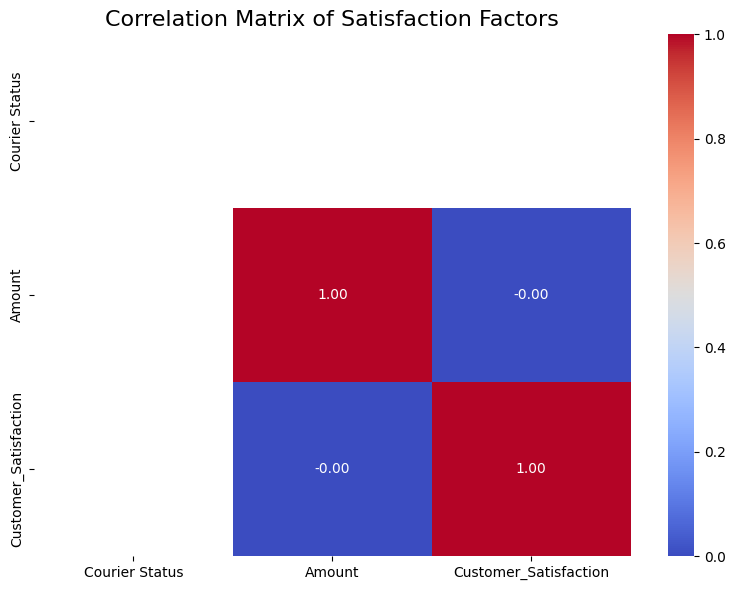

In [10]:
#  Heatmap: Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Satisfaction Factors", fontsize=16)
plt.tight_layout()
plt.show()


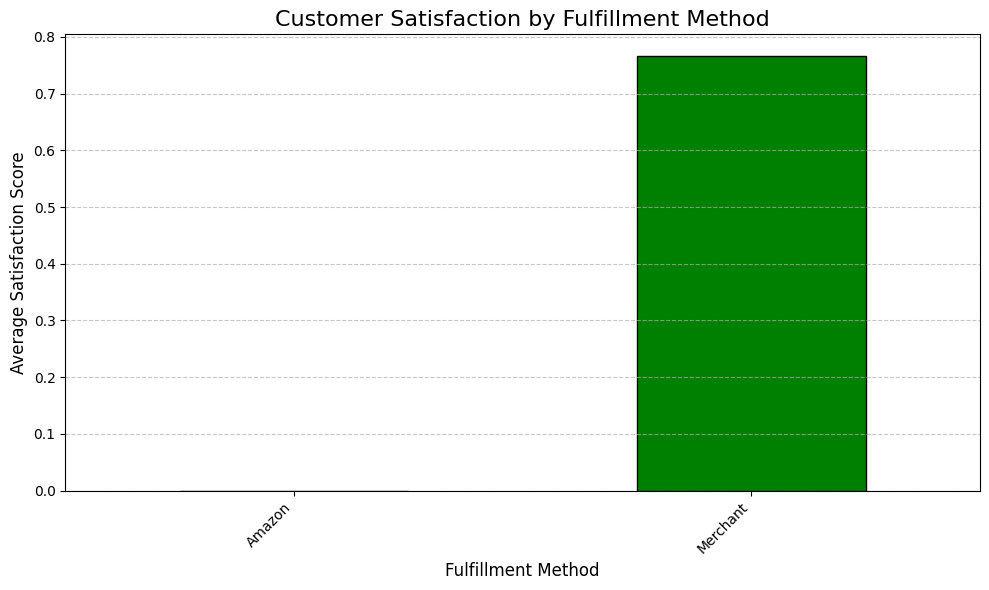

In [ ]:
#  Bar Graph: Customer Satisfaction by Fulfillment Method
plt.figure(figsize=(10, 6))
satisfaction_by_fulfillment.plot(kind='bar', color='green', edgecolor='black')
plt.title("Customer Satisfaction by Fulfillment Method", fontsize=16)
plt.xlabel("Fulfillment Method", fontsize=12)
plt.ylabel("Average Satisfaction Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

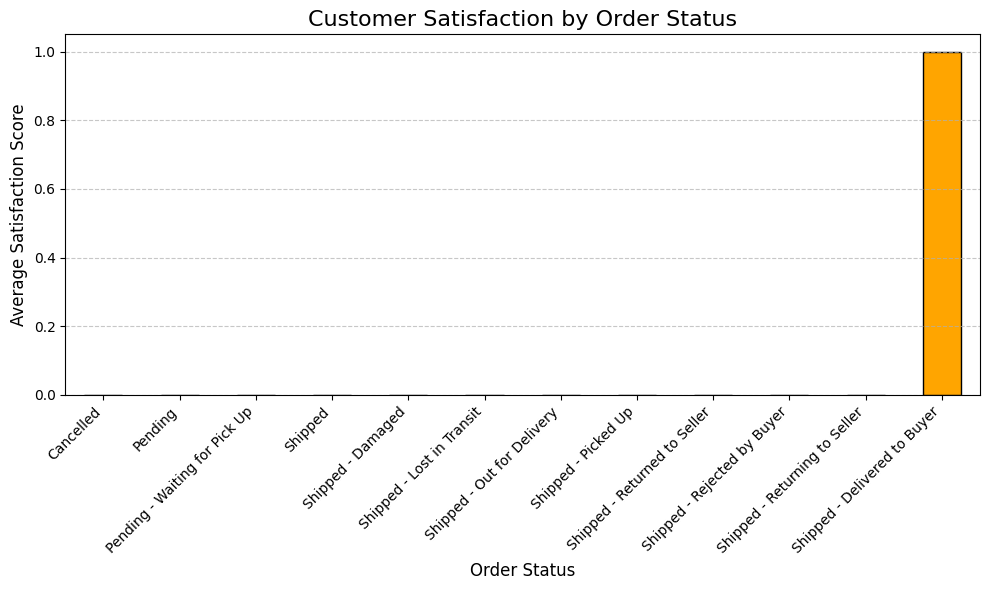

In [ ]:
# Bar Graph: Customer Satisfaction by Order Status
plt.figure(figsize=(10, 6))
satisfaction_by_status.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Customer Satisfaction by Order Status", fontsize=16)
plt.xlabel("Order Status", fontsize=12)
plt.ylabel("Average Satisfaction Score", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_28236\2930481843.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Fulfillment Method")


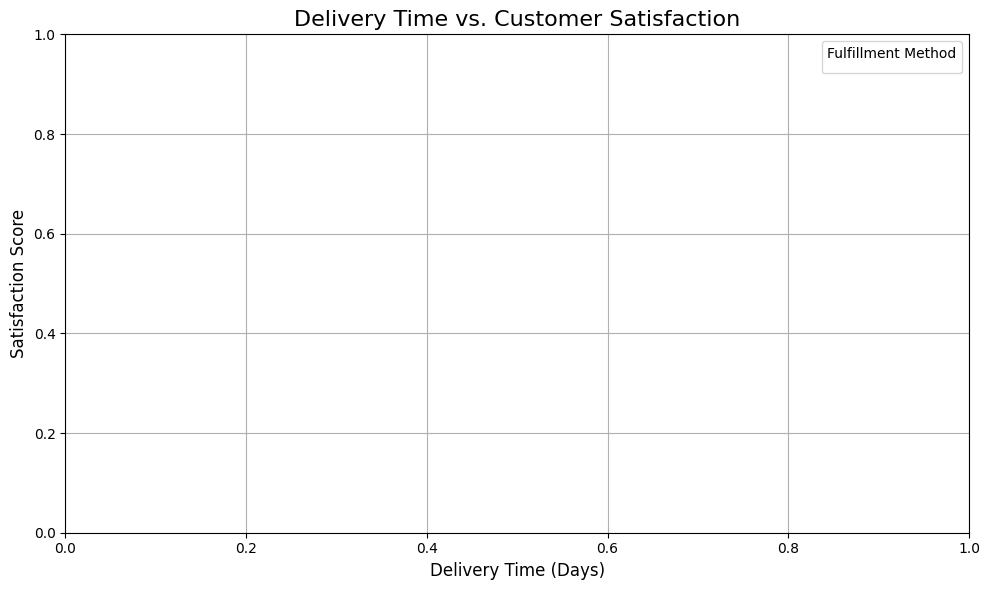

In [ ]:
# Scatter Plot: Delivery Time vs. Customer Satisfaction
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Courier Status', y='Customer_Satisfaction', hue='Fulfilment', palette='Set2', s=100)
plt.title("Delivery Time vs. Customer Satisfaction", fontsize=16)
plt.xlabel("Delivery Time (Days)", fontsize=12)
plt.ylabel("Satisfaction Score", fontsize=12)
plt.grid(True)
plt.legend(title="Fulfillment Method")
plt.tight_layout()
plt.show()

Insights:
High Satisfaction: Analyze which fulfillment methods and statuses contribute to higher satisfaction.
Low Satisfaction: Identify potential causes like delayed delivery or incomplete orders.
Delivery Time Impact: Understand how delivery time influences satisfaction.
